In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/ohe_data.csv')
df.head()

,Unnamed: 0,Severity,Start_Time,Start_Lat,Start_Lng,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,0,1,2016-02-08 00:37:08,40.108910,-83.092860,42.1,58.0,29.76,10.0,10.4,...,0,0,0,0,0,0,0,0,0,0
1,1,0,2016-02-08 05:56:20,39.865420,-84.062800,36.9,91.0,29.68,10.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,2016-02-08 06:15:39,39.102660,-84.524680,36.0,97.0,29.70,10.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,2016-02-08 06:51:45,41.062130,-81.537840,39.0,55.0,29.65,10.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,4,1,2016-02-08 07:53:43,39.172393,-84.492792,37.0,93.0,29.69,10.0,10.4,...,0,0,0,0,0,0,0,0,0,0


In [3]:
fdf = df.drop(columns=['Unnamed: 0', 'Start_Time', 'Start_Lat', 'Start_Lng'])
fdf.columns

Index(['Severity', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)', 'Amenity',
       'Bump', 'Crossing',
       ...
       'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19',
       'hour_20', 'hour_21', 'hour_22', 'hour_23'],
      dtype='object', length=130)

In [4]:
# sunrise_sunset is still string. Convert to 0/1
fdf['Sunrise_Sunset'] = [0 if i == 'Night' else 1 for i in fdf['Sunrise_Sunset']]

In [5]:
# get subset of data to test on
small_df = fdf
small_df['Severity'].value_counts(normalize=True)

0    0.900065
1    0.099935
Name: Severity, dtype: float64

In [6]:
# Scale data
ss = StandardScaler()
sdf_ss = ss.fit_transform(small_df.drop(columns=['Severity']))

In [8]:
# show components that explain 80% of variance
pca = PCA(n_components=0.8)
pca.fit(sdf_ss)

PCA(n_components=0.8)

In [12]:
# there are 85 of these!
n_comps = len(pca.explained_variance_ratio_)
n_comps

85

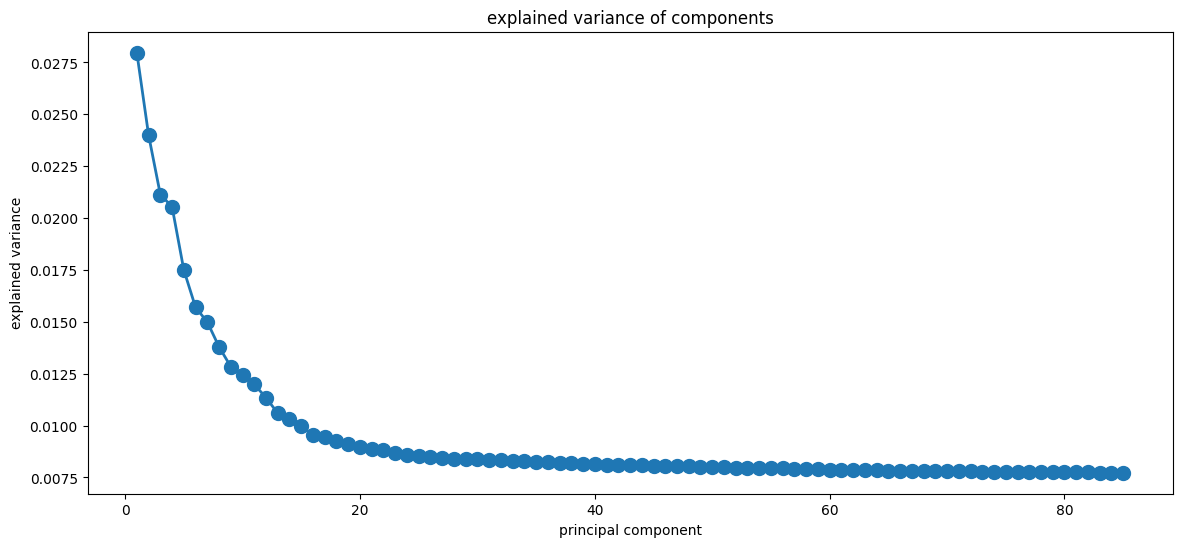

In [13]:
# plot to show distribution
fig, ax = plt.subplots(figsize=(14,6))
ax.plot(range(1,n_comps+1), pca.explained_variance_ratio_, lw=2)
ax.scatter(range(1, n_comps+1), pca.explained_variance_ratio_, s=100)
ax.set_title('explained variance of components')
ax.set_xlabel('principal component')
ax.set_ylabel('explained variance');

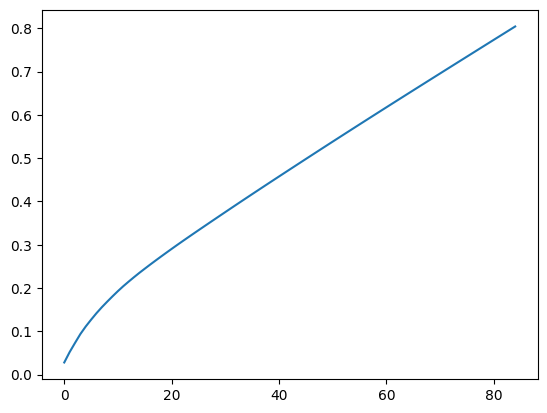

In [14]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [15]:
component_df = pd.DataFrame(pca.components_, columns=small_df.drop(columns=['Severity']).columns)
component_df.head(8)

,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Amenity,Bump,Crossing,Give_Way,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,0.182968,-0.000429,0.125541,0.090068,0.078782,0.006471,0.059123,0.003062,0.162183,0.017686,...,0.035030,0.035234,0.037708,0.019162,0.002024,-0.010055,-0.013775,-0.020110,-0.022498,-0.022171
1,-0.345697,0.406350,0.068141,-0.243517,-0.046814,0.063032,-0.021999,-0.019452,-0.066272,0.002147,...,-0.077597,-0.086587,-0.080344,-0.049134,-0.013751,0.010463,0.034384,0.040311,0.048516,0.056923
2,0.009819,-0.151988,-0.317725,0.094224,0.193032,-0.007800,-0.026165,0.002790,-0.011131,0.008347,...,0.034542,0.039598,0.045566,0.019272,-0.001287,-0.016577,-0.029874,-0.039009,-0.034955,-0.036911
3,0.229730,-0.037871,0.304601,0.066789,0.093977,0.021621,-0.054007,-0.031027,-0.146538,-0.018713,...,0.058916,0.065756,0.060443,0.024673,-0.010292,-0.039029,-0.057577,-0.068048,-0.068028,-0.063371
4,0.010187,0.011051,0.109597,-0.022812,0.107917,-0.001545,0.033903,0.001119,0.052792,0.018247,...,0.015810,0.019733,0.026084,0.014047,-0.003825,-0.011129,-0.016008,-0.015102,-0.015910,-0.010618
5,-0.029060,0.099898,-0.058267,-0.260129,0.194297,0.104542,0.043630,-0.001643,0.077898,0.001342,...,0.064859,0.067977,0.055659,0.001127,-0.037688,-0.062753,-0.087742,-0.095337,-0.092404,-0.090343
6,0.056694,0.048314,-0.117021,-0.250098,0.006941,0.095848,-0.056018,-0.026928,-0.169391,-0.039276,...,0.046766,0.052423,0.031752,0.002257,-0.037749,-0.034377,-0.036155,-0.032180,-0.036882,-0.045550
7,0.020533,0.026771,0.023167,-0.041928,-0.011598,0.024847,0.021377,0.695017,0.045274,0.005040,...,-0.001493,-0.001777,-0.003443,-0.002815,-0.003536,-0.003971,-0.002758,-0.000814,-0.001190,-0.002186


## Conclusion

Not enough variance explained through just one component. PCA is not really helpful here.